# How to write a Python ROOTBook
<hr style="border-top-width: 4px; border-top-color: #34609b;">
In order to use [ROOT](root.cern.ch) in a Python notebook, we first need to import the ROOT module. During the import, all notebook related functionalities are activated. That's it. 
We will see also how the user can mark cells containing C++ statements with the **%%cpp** magic, producing *de facto* multilanguage ROOTBooks.

In [1]:
import ROOT

Welcome to JupyROOT 6.07/01


Now we are ready to use [PyROOT](https://root.cern.ch/how/how-use-pyroot-root-python-bindings), the [ROOT](root.cern.ch) Python bindings. For example, we create a [ROOT histogram](https://root.cern.ch/doc/master/classTH1F.html) and fill it with [random numbers](https://root.cern.ch/doc/master/classTRandom.html) distributed according to a Gaussian.

In [2]:
h = ROOT.TH1F("gauss","Example histogram",64,-4,4)
h.FillRandom("gaus")

Now, we create a [canvas](https://root.cern.ch/doc/master/classTCanvas.html), the entity which holds graphics primitives.

In [3]:
c = ROOT.TCanvas("myCanvasName","The Canvas Title",1600,1200)
h.Draw()

For the histogram to be displayed in the notebook, we need to draw the canvas.

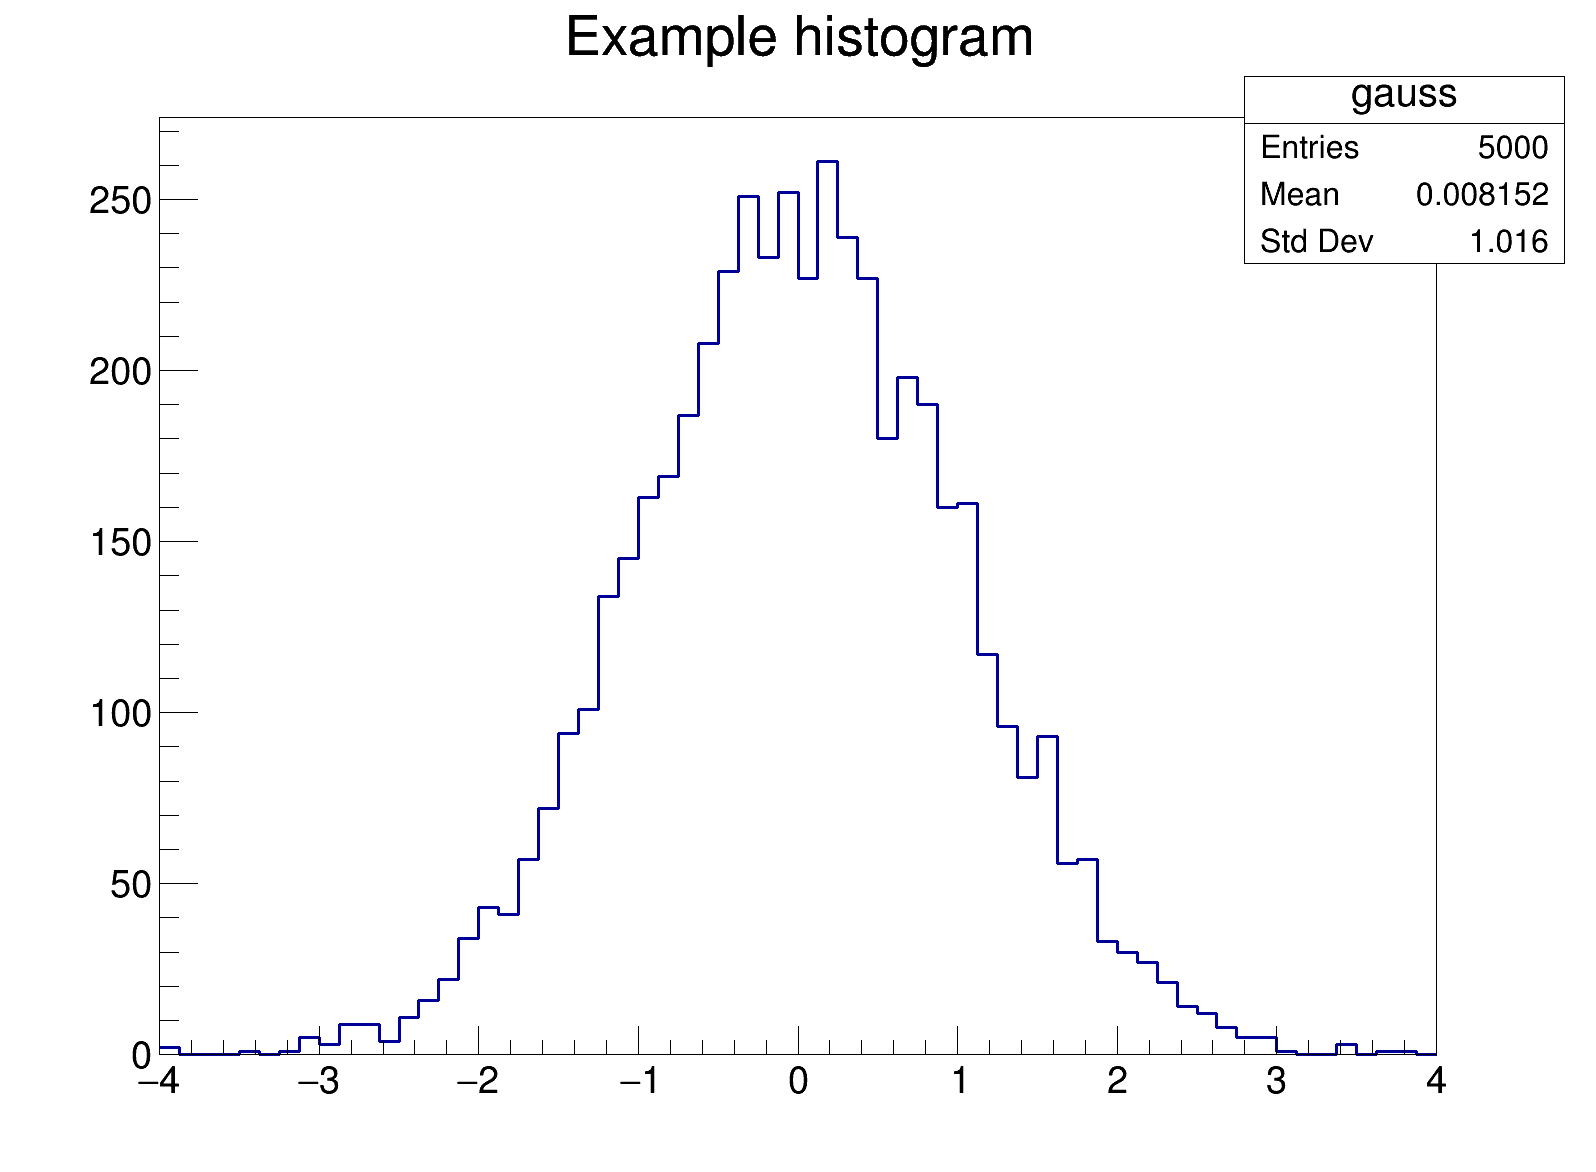

In [4]:
c.Draw()

It is not active by default yet, but Javascript visualisation can be activated for testing purposes. The plot below will be interactive: click on it and discover the [JSROOT](https://root.cern.ch/js/) capabilities!

In [5]:
ROOT.enableJSVis()
c.Draw()
ROOT.disableJSVis()

Before moving forward, let's save our histogram on a file. All ROOT objects can be written to [ROOT files](https://root.cern.ch/doc/master/classTFile.html) out-of-the-box.

In [6]:
outputFile = ROOT.TFile("output.root","RECREATE")
h.Write()
outputFile.Close()

Let's check what is the content of the file with the [*rootls*](https://root.cern.ch/how/how-quickly-inspect-content-file) command line utility

In [7]:
%%bash 
rootls -l output.root

TH1F  Dec 15 09:50  gauss  "Example histogram"


## Interleave Python with C++: the %%cpp magic
Thanks to ROOT, it is possibile to write cells in C++ within a Python notebook. This can be done using the %%cpp magic. Magics are a feature of Jupyter notebooks and when importing the ROOT module, the %%cpp magic was registered.

In [8]:
%%cpp
cout << "This is a C++ cell" << endl;

This is a C++ cell


Not bad. On the other hand, ROOT offers much more than this. Thanks to its [interpreter](https://root.cern.ch/cling) and [type system](https://root.cern.ch/doc/master/classTClass.html), entities such as functions, classes and variables, created in a C++ cell, can be accessed from within Python (and viceversa, partially).

In [9]:
%%cpp
class A{
    public:
    A(){cout << "Constructor of A!" << endl;}
};

In [10]:
a = ROOT.A()

Constructor of A!


The Python and C++ worlds are so entangled that we can find back in C++ the entities created in Python. To illustrate this, from within a C++ cell, we are going to fit a function in the gauss histogram displayed above and then re-draw the canvas.

 FCN=47.4997 FROM MIGRAD    STATUS=CONVERGED      53 CALLS          54 TOTAL
                     EDM=8.44224e-09    STRATEGY= 1      ERROR MATRIX ACCURATE 
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  Constant     2.46469e+02   4.31494e+00   1.19094e-02  -2.44811e-05
   2  Mean         1.04782e-02   1.43576e-02   4.87656e-05  -6.34020e-03
   3  Sigma        1.00315e+00   1.03818e-02   9.45504e-06  -2.70309e-02


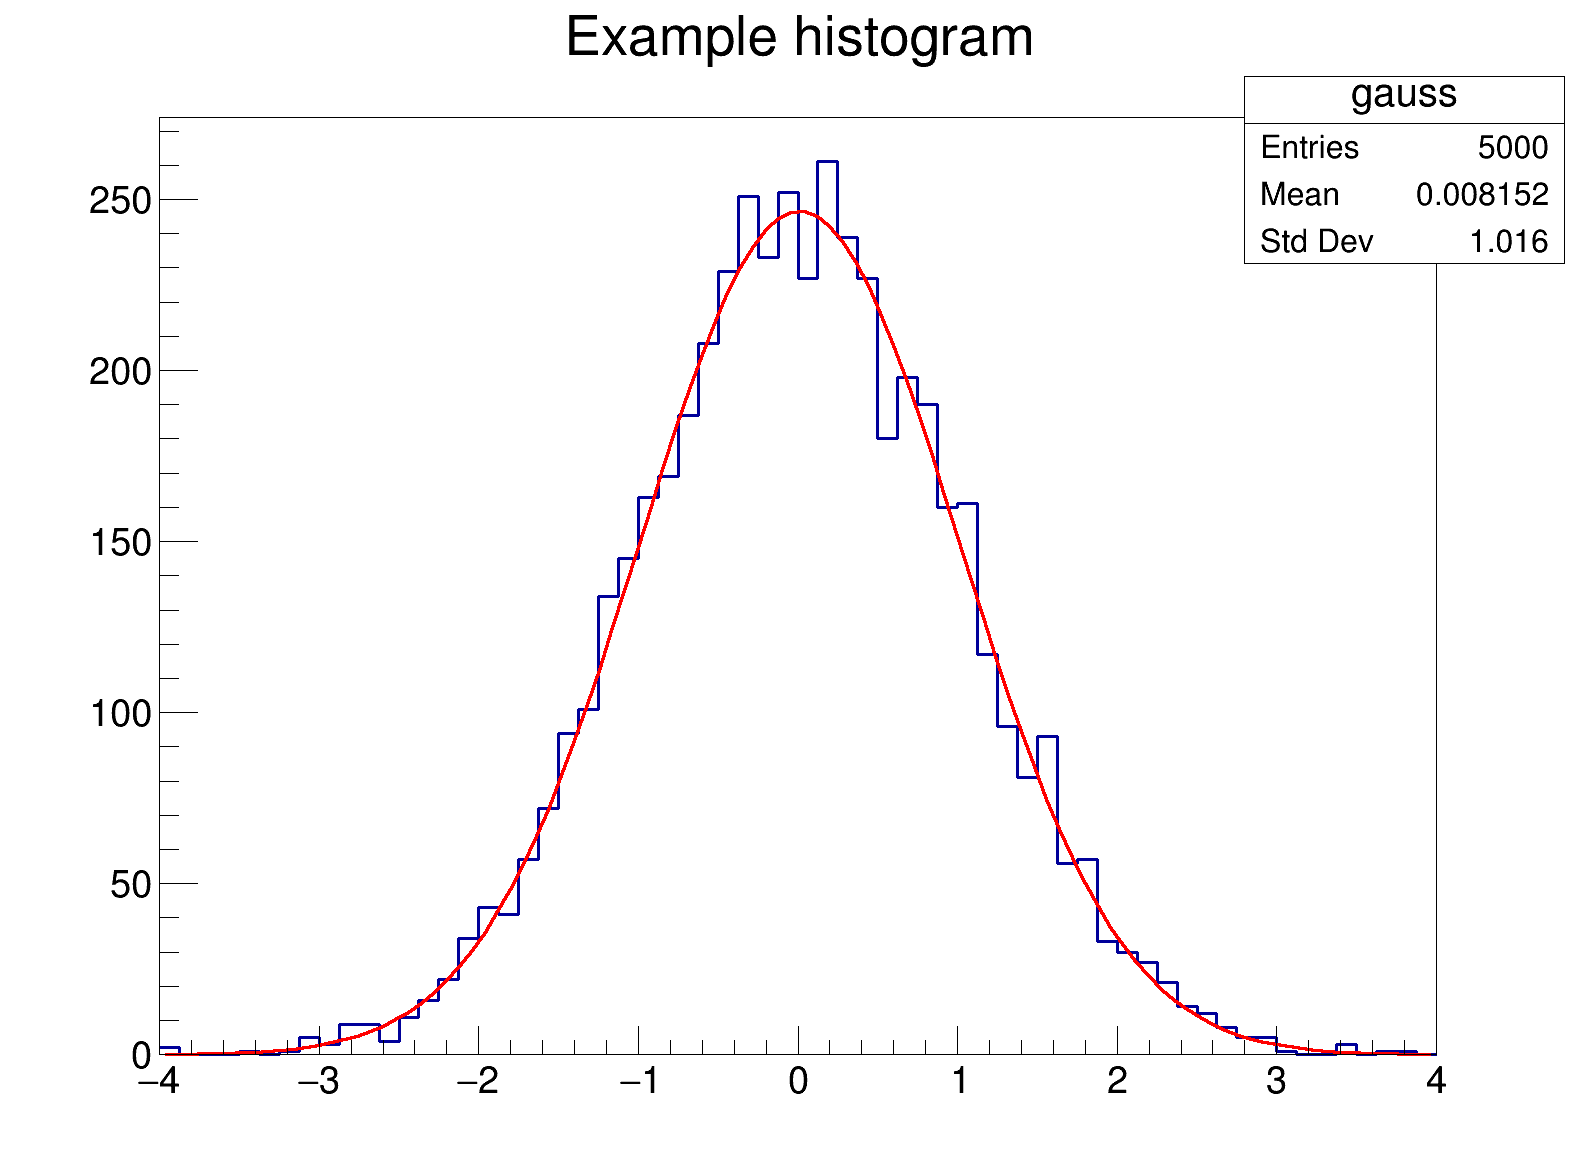

In [11]:
%%cpp
gauss->Fit("gaus", "S");
myCanvasName->Draw();

Complete interoperability is possible. Let's move now to the options offered by the %%cpp magic.
## The options of the %%cpp magic

The %%cpp magic accepts two options: -d and -a. Their documentation can be seen by typing:


In [ ]:
%%cpp?

A window will appear at the bottom of the page, showing the documentation.

### Declaration of functions

The **-d** option needs to be used when declaring functions: we must to be explicit.

In [12]:
%%cpp -d
void f() {
    cout << "This is function f" << endl;
}

As usual, function f can also be accessed from Python.

In [13]:
print "This is again Python"
ROOT.f()

This is again Python
This is function f


The implementation of the function can be inspected within a C++ cell:

In [14]:
%%cpp
f

(void (*)()) Function @0x7f6ced7ce030
  at :1:
void f() {
    cout << "This is function f" << endl;
}



### Advanced: ACliC
The **-a** allows to compile the cell code with ACLiC. This is not so relevant for performance since the ROOT interpreter just in time compiles the C++ code. Nevertheless, ACLiC is most useful when the automatic creation of dictionaries is required, for example in presence of I/O operations.

In [15]:
%%cpp -a
class CompileMe {
public:
    CompileMe() {}
    void run() {}
};

Info in <TUnixSystem::ACLiC>: creating shared library /home/dpiparo/CERNBox/TryROOT/notebooks/64a4a5eb_C.so


Let's verify that the dictionary is there:

In [16]:
ROOT.TClass.GetClass("CompileMe").HasDictionary()

True

Note that the class created previously A has no dictionary.

In [17]:
ROOT.TClass.GetClass("A").HasDictionary()

False